# Visualize network topology

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import PIPELINE_RUN_DIR, NETWORKS, FIGURE_DIR
from functions import load_network_topology, save_figure
prefix = "02"

Read data

In [2]:
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
df = load_network_topology()
print(df.to_string())

                                                     nodes    edges  components  largest_component  diameter  self_loops  duplicate_edges                                network
Network                                                                                                                                                                         
string.human_physical_links_v12_0_min900.Symbol       7713    36771         425               6477      18.0           0                0  STRING (physical, highest confidence)
string.human_physical_links_v12_0_min700.Symbol      10387    83386         331               9499      15.0           0                0     STRING (physical, high confidence)
string.human_links_v12_0_min900.Symbol               11927    97588         241              11304      17.0           0                0            STRING (highest confidence)
nedrex.reviewed_proteins_exp_high_confidence.Symbol  12811   102497          36              12734      10.0       

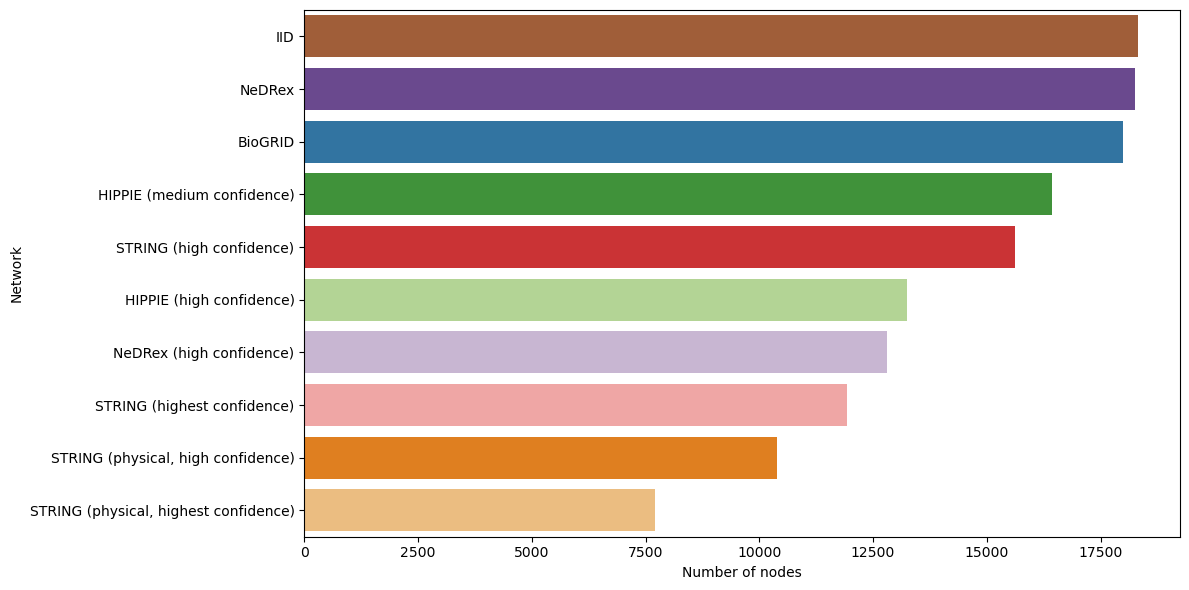

In [3]:
# Plot bar chart

df_sorted = df.sort_values("nodes", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="nodes", y="network", hue="network", palette=dict(zip(network_meta_df.label, network_meta_df.color)))
plt.xlabel("Number of nodes")
plt.ylabel("Network")
plt.tight_layout()
plt.show()

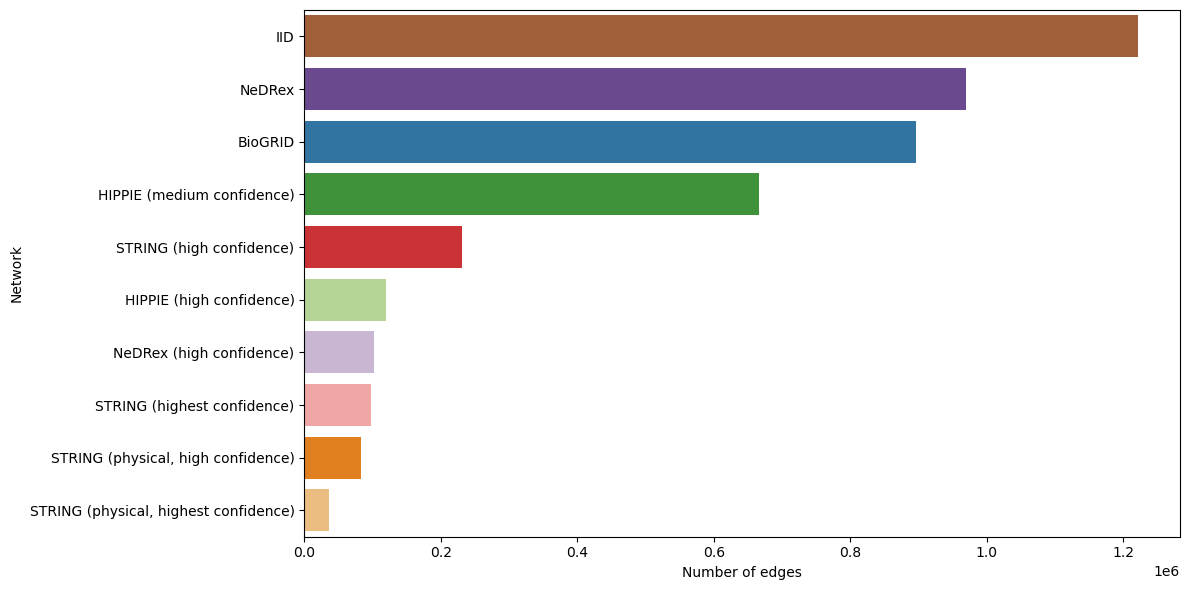

In [4]:
# Plot bar chart

df_sorted = df.sort_values("edges", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_sorted, x="edges", y="network", hue="network", 
    hue_order=network_meta_df.label, palette=dict(zip(network_meta_df.label, network_meta_df.color))
)
plt.xlabel("Number of edges")
plt.ylabel("Network")
plt.tight_layout()
plt.show()

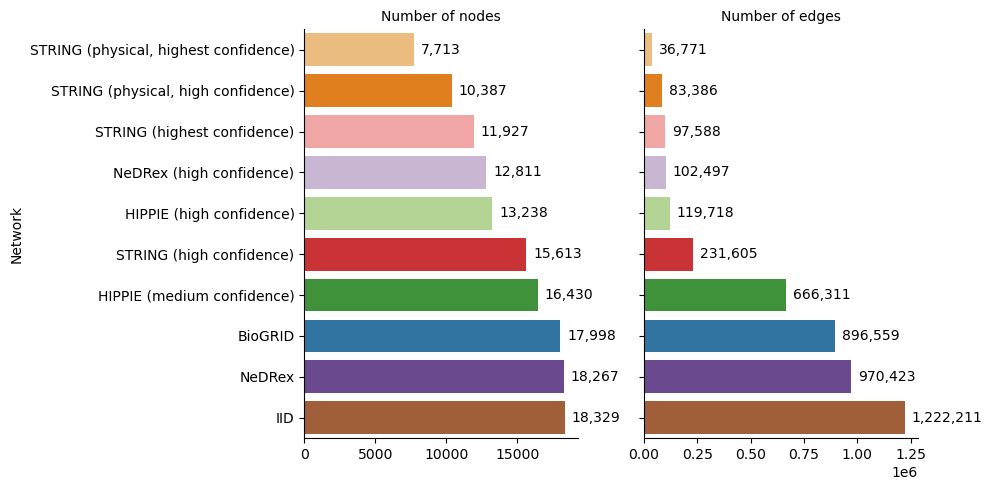

In [5]:
df_melted = df.melt(id_vars=["network"], value_vars=["edges", "nodes"], 
                    var_name="type", value_name="count")

# Create the FacetGrid
g = sns.FacetGrid(df_melted, col="type", col_order=["nodes","edges"], height=5, sharex=False)

# Map the bar plot to the facets
g.map_dataframe(sns.barplot, x="count", y="network", hue="network", palette=dict(zip(network_meta_df.label, network_meta_df.color)))

# Annoate the bars with the values
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(
            f'{p.get_width():,.0f}',  # Format the value
            (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),  # Position of the text
            ha='left', va='center',  # Horizontal and vertical alignment
            fontsize=10, color='black',  # Font size and color
            xytext=(5, 0), textcoords='offset points'  # Offset the text a bit
        )

# Customize axes and titles
g.set_axis_labels("", "Network")
g.set_titles("Number of {col_name}")
g.tight_layout()
save_figure(plt.gcf(), f"{prefix}_network_sizes")
plt.show()



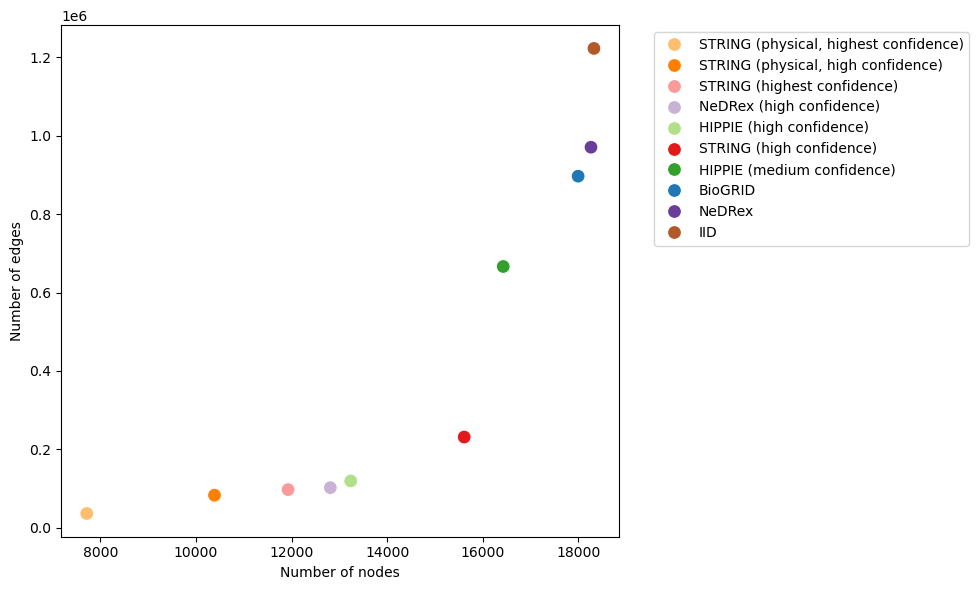

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="nodes", y="edges", hue="network", s=100, palette=dict(zip(network_meta_df.label, network_meta_df.color)))
plt.xlabel("Number of nodes")
plt.ylabel("Number of edges")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

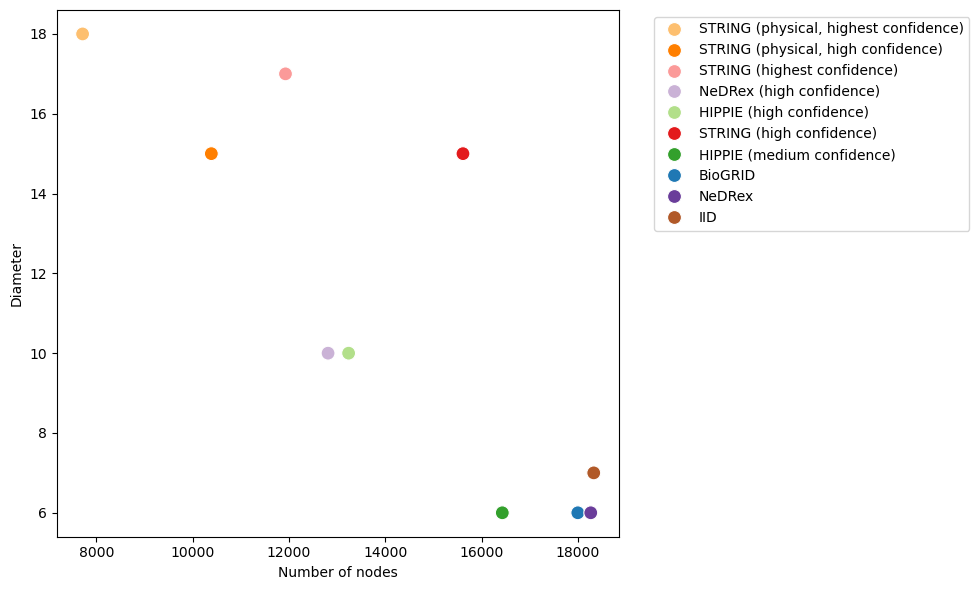

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="nodes", y="diameter", hue="network", s=100, palette=dict(zip(network_meta_df.label, network_meta_df.color)))
plt.xlabel("Number of nodes")
plt.ylabel("Diameter")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

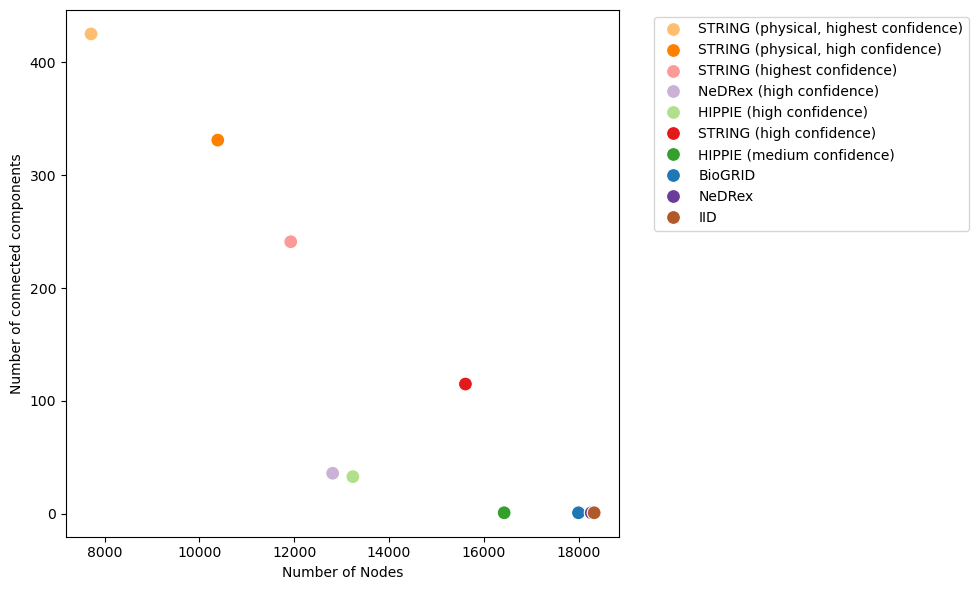

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="nodes", y="components", hue="network", s=100, palette=dict(zip(network_meta_df.label, network_meta_df.color)))
plt.xlabel("Number of Nodes")
plt.ylabel("Number of connected components")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()